In [51]:
%reload_ext autoreload
%autoreload 2

In [52]:
from pathlib import Path
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
def read_lines(infile):
    with infile.open() as f:
        for x in f:
            items = x.strip().split('::')
            yield int(items[0]), int(items[1]), float(items[2])

In [54]:
infile = Path.home() / 'data' / 'ml-1m' / 'ratings.dat'

reader = read_lines(infile)
df = pd.DataFrame.from_records(reader, columns=['user_id','movie_id','rating'])
INPUT = df

In [55]:
df = df.groupby('user_id').movie_id.nunique()
df

user_id
1        53
2       129
3        51
4        21
5       198
       ... 
6036    888
6037    202
6038     20
6039    123
6040    341
Name: movie_id, Length: 6040, dtype: int64

In [56]:
dx =  df.map(lambda n: (n**2 -n)/2)
dx.sum()

194494663.0

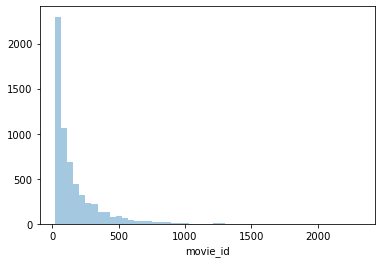

In [57]:
sns.distplot(df, kde=False)

In [58]:
INPUT.movie_id.nunique()

3706

In [60]:
df.head()

user_id
1     53
2    129
3     51
4     21
5    198
Name: movie_id, dtype: int64

In [61]:
dx.head()

user_id
1     1378.0
2     8256.0
3     1275.0
4      210.0
5    19503.0
Name: movie_id, dtype: float64